# 3.2 예제 : 손글씨 숫자 이미지 분류 문제(p.74)
240116

## 3.2.2 CNN으로 손글씨 숫자 이미지 분류하기

### 모듈 불러오기

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

import matplotlib.pyplot as plt
%matplotlib inline

### 분석 환경 설정

In [3]:
is_cuda = torch.cuda.is_available()
device = torch.device('cuda' if is_cuda else 'cpu')

print('Current cuda device is', device) # GPU 사용시 cuda, CPU 사용시 cpu

Current cuda device is cuda


### Hyper Parameter 지정

In [4]:
batch_size = 50
epoch_num = 15
learning_rate = 0.0001

### MNIST 데이터 불러오기

In [5]:
train_data = datasets.MNIST(root= './data',
                            train= True,
                            download= True,
                            transform= transforms.ToTensor())
test_data = datasets.MNIST(root= './data',
                           train= False,
                           transform= transforms.ToTensor())

print('number of training data :', len(train_data))
print('number of test data     :', len(test_data))

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

number of training data : 60000
number of test data     : 10000


### MNIST 데이터 확인하기

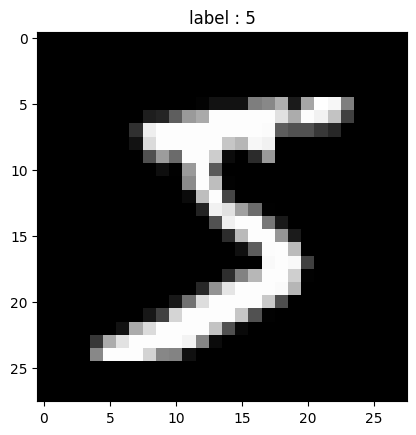

In [6]:
img, label = train_data[0]

plt.imshow(img.squeeze().numpy(),
           cmap= 'gray')
plt.title('label : %s' % label)
plt.show()

### 미니 배치 구성하기

In [9]:
train_loader = torch.utils.data.DataLoader(dataset= train_data,
                                           batch_size= batch_size,
                                           shuffle= True)
test_loader = torch.utils.data.DataLoader(dataset= test_data,
                                          batch_size= batch_size,
                                          shuffle= True)

first_batch = train_loader.__iter__().__next__()
print('{:15s} | {:<25s} | {}'.format('name',
                                      'type',
                                      'size'))
print('{:15s} | {:<25s} | {}'.format('Num of Batch',
                                      '',
                                      len(train_loader)))
print('{:15s} | {:<25s} | {}'.format('first_batch',
                                      str(type(first_batch)),
                                      len(first_batch)))
print('{:15s} | {:<25s} | {}'.format('first_batch[0]',
                                      str(type(first_batch[0])),
                                      first_batch[0].shape))
print('{:15s} | {:<25s} | {}'.format('first_batch[1]',
                                      str(type(first_batch[1])),
                                      first_batch[1].shape))

name            | type                      | size
Num of Batch    |                           | 1200
first_batch     | <class 'list'>            | 2
first_batch[0]  | <class 'torch.Tensor'>    | torch.Size([50, 1, 28, 28])
first_batch[1]  | <class 'torch.Tensor'>    | torch.Size([50])


### CNN 구조 설계하기

In [10]:
class CNN(nn.Module) :
    def __init__(self) :
        super(CNN,self).__init__()
        self.conv1 = nn.Conv2d(1,32,3,1)
        self.conv2 = nn.Conv2d(32,64,3,1)
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128,10)
    
    def forward(self,x) :
        x = self.conv1(x)
        x = F.relu(x)
        
        x = self.conv2(x)
        x = F.relu(x)
        
        x = F.max_pool2d(x,2)
        
        x = self.dropout1(x)
        
        x = torch.flatten(x,1)
        
        x = self.fc1(x)
        x = F.relu(x)
        
        x = self.dropout2(x)
        x = self.fc2(x)
        
        output = F.log_softmax(x,dim= 1)
        return output

### Optimizer 및 손실 함수 정의

In [11]:
model = CNN().to(device)
optimizer = optim.Adam(model.parameters(),
                       lr= learning_rate)
criterion = nn.CrossEntropyLoss()

### 설계한 CNN 모형 확인하기

In [12]:
print(model)

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout2d(p=0.25, inplace=False)
  (dropout2): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


### 모델 학습

In [14]:
model.train()
i = 0
for epoch in range(epoch_num) : # epoch_num = 15
    for data, target in train_loader :
        data = data.to(device)
        target = target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output,target)
        loss.backward()
        optimizer.step()
        if i % 1000 == 0 :
            print('Train Step : {}\tLoss : {:.3f}'.format(i,loss.item()))
        i += 1

Train Step : 0	Loss : 2.302
Train Step : 1000	Loss : 0.345
Train Step : 2000	Loss : 0.230
Train Step : 3000	Loss : 0.074
Train Step : 4000	Loss : 0.103
Train Step : 5000	Loss : 0.208
Train Step : 6000	Loss : 0.186
Train Step : 7000	Loss : 0.066
Train Step : 8000	Loss : 0.196
Train Step : 9000	Loss : 0.003
Train Step : 10000	Loss : 0.042
Train Step : 11000	Loss : 0.055
Train Step : 12000	Loss : 0.044
Train Step : 13000	Loss : 0.004
Train Step : 14000	Loss : 0.025
Train Step : 15000	Loss : 0.023
Train Step : 16000	Loss : 0.010
Train Step : 17000	Loss : 0.048


### 모델 평가

In [15]:
model.eval()
correct = 0
for data,target in test_loader :
    data = data.to(device)
    target = target.to(device)
    output = model(data)
    prediction = output.data.max(1)[1]
    correct += prediction.eq(target.data).sum()
print('Test Set Accuracy : {:.2f}%'.format(100*correct/len(test_loader.dataset)))

Test Set Accuracy : 99.05%
